# Libraries

In [1]:
import gdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

# Data Information

In [2]:
train_file_id = '13CmwHUrChuJTyjZ5g9DHZXgF0evtBcxg'
train_output_file = '/content/train.csv'
train_download_url = f'https://drive.google.com/uc?id={train_file_id}'
gdown.download(train_download_url, train_output_file, quiet=False)
df = pd.read_csv(train_output_file)

Downloading...
From: https://drive.google.com/uc?id=13CmwHUrChuJTyjZ5g9DHZXgF0evtBcxg
To: /content/train.csv
100%|██████████| 685k/685k [00:00<00:00, 15.2MB/s]


In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
obj = [col for col in df.columns if df[col].nunique() <= 10]
for col in obj:
  print(f"====={col}=====")
  unique_values = df[col].unique()
  n_unique_values = df[col].nunique()
  value_counts = df[col].value_counts()

  print(f"Unique values in {col}: {unique_values}")
  print(f"Number of unique values in {col}: {n_unique_values}")
  print(f"Value counts in {col}:\n{value_counts}\n")

=====Geography=====
Unique values in Geography: ['France' 'Spain' 'Germany']
Number of unique values in Geography: 3
Value counts in Geography:
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

=====Gender=====
Unique values in Gender: ['Female' 'Male']
Number of unique values in Gender: 2
Value counts in Gender:
Gender
Male      5457
Female    4543
Name: count, dtype: int64

=====NumOfProducts=====
Unique values in NumOfProducts: [1 3 2 4]
Number of unique values in NumOfProducts: 4
Value counts in NumOfProducts:
NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

=====HasCrCard=====
Unique values in HasCrCard: [1 0]
Number of unique values in HasCrCard: 2
Value counts in HasCrCard:
HasCrCard
1    7055
0    2945
Name: count, dtype: int64

=====IsActiveMember=====
Unique values in IsActiveMember: [1 0]
Number of unique values in IsActiveMember: 2
Value counts in IsActiveMember:
IsActiveMember
1    5151
0    4849
Name: coun

# EDA

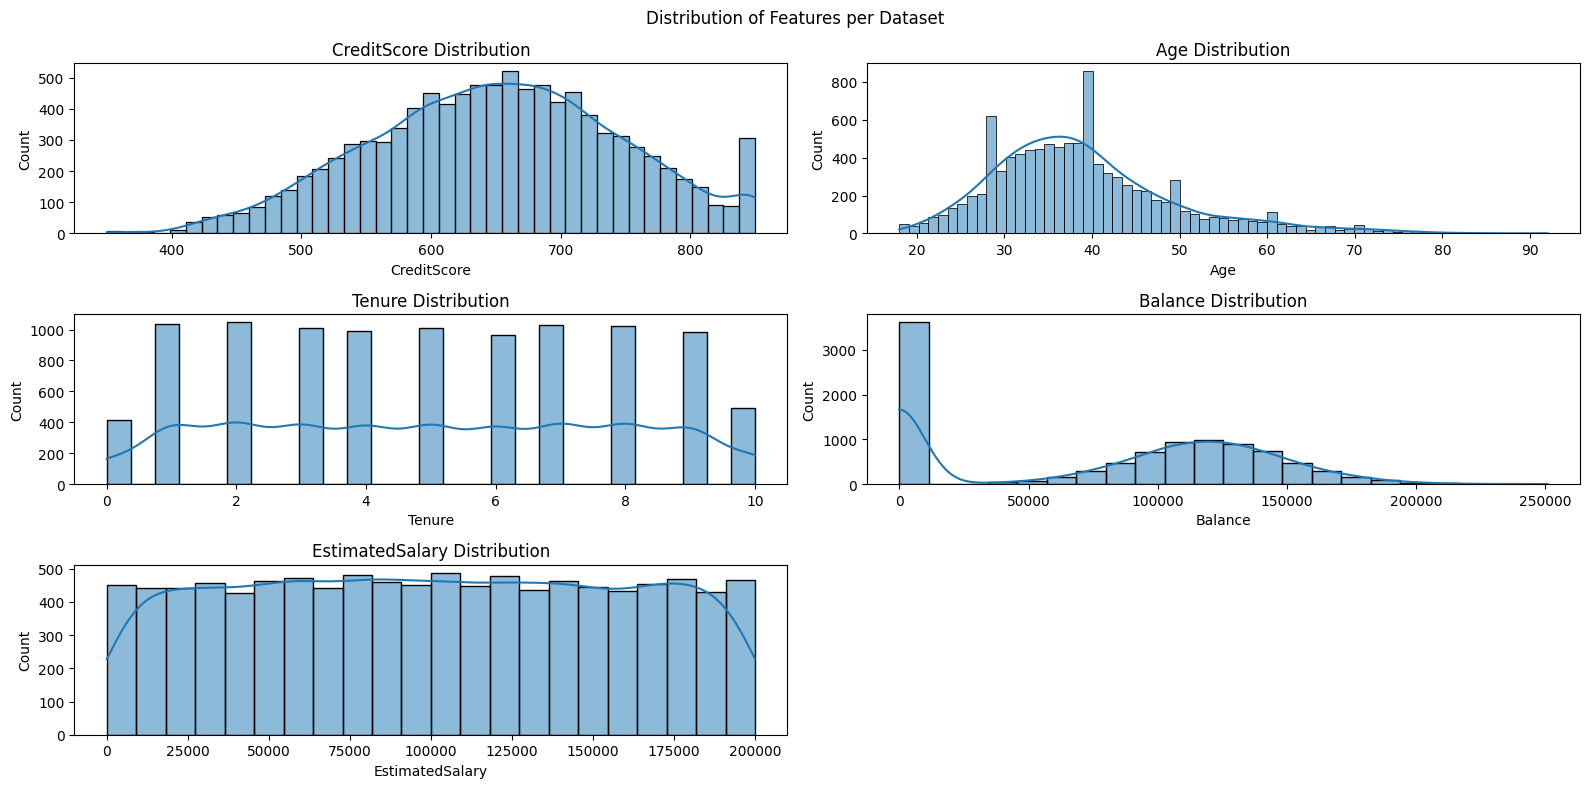

In [6]:
columns = [col for col in df.columns if df[col].nunique() >= 10 and df[col].dtype in ['float64', 'int64'] and col not in ['RowNumber', 'CustomerId']]
fig, axes = plt.subplots(3, 2, figsize = (16, 8))
axes = axes.flatten()

for i, col in enumerate(columns):
  ax = sns.histplot(data = df, x = col, ax = axes[i], kde = True)
  ax.set_title(f'{col} Distribution')
  ax.set_xlabel(f'{col}')

fig.delaxes(axes[-1])
fig.suptitle('Distribution of Features per Dataset')
plt.tight_layout()
plt.show()

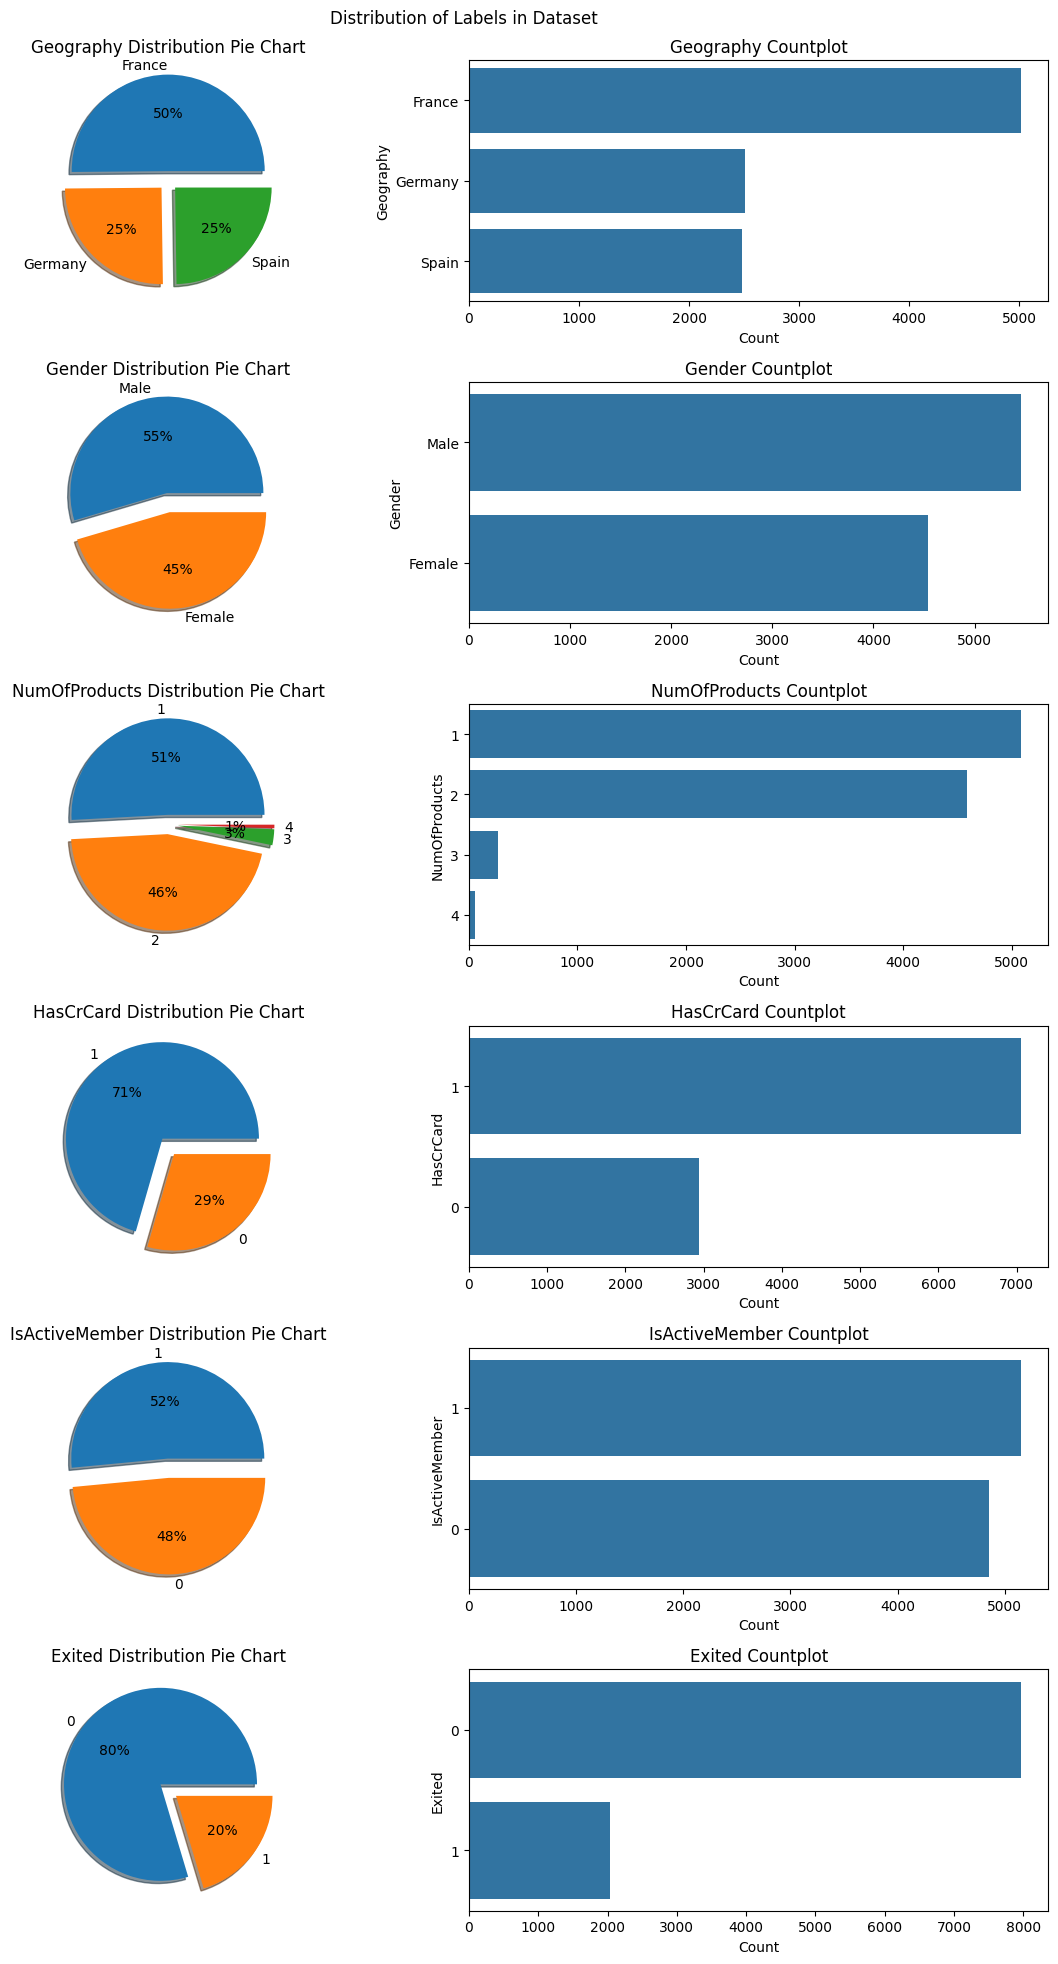

In [7]:
fig, axes = plt.subplots(len(obj), 2, figsize = (12, 20))

for i, col in enumerate(obj):
  ax = axes[i, 0]
  ax.pie(
      df[col].value_counts(),
      shadow = True,
      explode=[0.1 for _ in range(df[col].nunique())],
      autopct = '%1.f%%',
      labels = df[col].value_counts().index
  )
  ax.set_aspect('equal')
  ax.set_title(f'{col} Distribution Pie Chart')

  ax1 = axes[i, 1]
  sns.countplot(y=col, ax=ax1, order=df[col].value_counts().index, data=df)
  ax1.set_xlabel('Count')
  ax1.set_ylabel(col)
  ax1.set_title(f'{col} Countplot')

fig.suptitle('Distribution of Labels in Dataset\n')
plt.tight_layout()
plt.show()

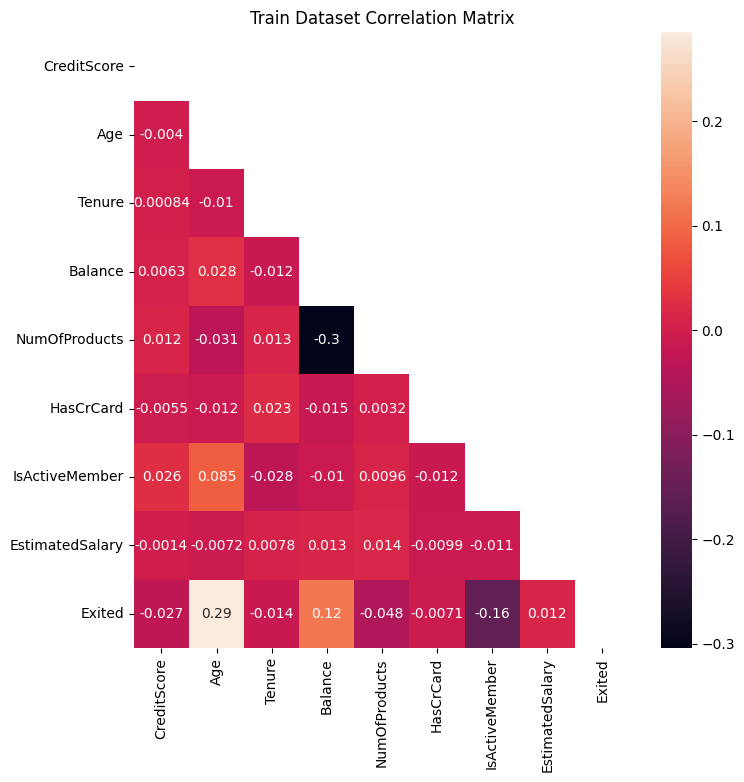

In [8]:
columns = [col for col in df.columns if col not in ['RowNumber', 'CustomerId'] and df[col].dtype in ['int64', 'float64']]

corr = df[columns].corr()
plt.figure(figsize=(8, 8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True)
plt.title('Train Dataset Correlation Matrix')
plt.show()

# Feature Engineerning

## Encoding

In [9]:
le = LabelEncoder()
cols = ['Geography', 'Gender']
for col in cols:
  df[col] = le.fit_transform(df[col])

In [10]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


## Scalling

In [11]:
scaler = MinMaxScaler()
df[['Balance', 'EstimatedSalary']] = scaler.fit_transform(df[['Balance', 'EstimatedSalary']])

## Train Test Split

In [12]:
cols = [col for col in df.columns if col not in ['RowNumber', 'CustomerId', 'Surname', 'Exited']]
X = df[cols]
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Modelling

In [13]:
model = Sequential()
model.add(Input(shape=(10,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 451 (1.76 KB)

 Trainable params: 451 (1.76 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=1, validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7919 - loss: 19.4029 - val_accuracy: 0.7556 - val_loss: 0.5015
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7811 - loss: 0.5017 - val_accuracy: 0.7987 - val_loss: 0.4668
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7945 - loss: 0.4849 - val_accuracy: 0.7987 - val_loss: 0.4675
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7924 - loss: 0.4834 - val_accuracy: 0.7987 - val_loss: 0.4613
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7912 - loss: 0.4795 - val_accuracy: 0.7987 - val_loss: 0.4803
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7857 - loss: 0.5100 - val_accuracy: 0.7987 - val_loss: 0.4864
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7967 - loss: 0.4837 - val_accuracy: 0.7987 - val_loss: 0.4615
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7942 - loss: 0.4795 - val_acc

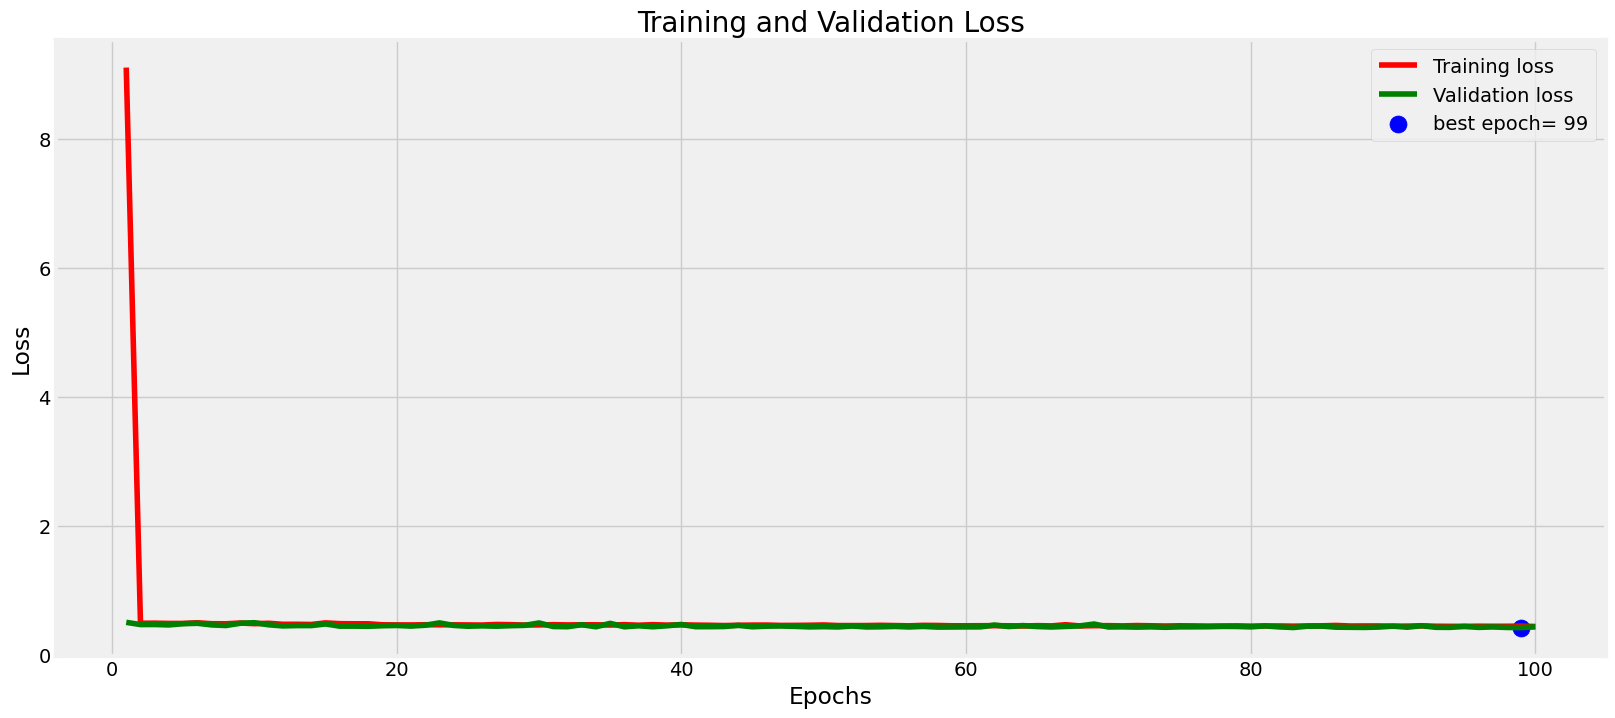

In [15]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()